In [50]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing    
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import datetime

In [29]:
# Load the data
df = pd.read_csv('data/Nat_Gas.csv')
df['Dates'] = pd.to_datetime(df['Dates'], format='%m/%d/%y')
df = df.sort_values('Dates')
df.set_index('Dates', inplace=True)
df.head()

,Prices
Dates,
2020-10-31,10.1
2020-11-30,10.3
2020-12-31,11.0
2021-01-31,10.9
2021-02-28,10.9


In [30]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2020-10-31 to 2024-09-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Prices  48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


,Prices
count,48.000000
mean,11.207083
std,0.757897
min,9.840000
25%,10.650000
50%,11.300000
75%,11.625000
max,12.800000


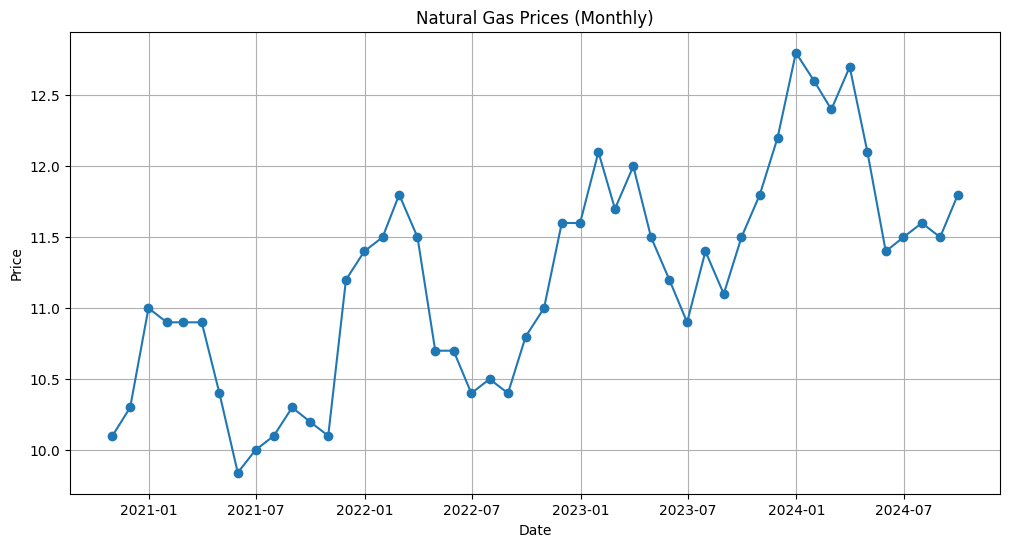

In [31]:
# Visualize data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Prices'], marker='o')
plt.title('Natural Gas Prices (Monthly)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()


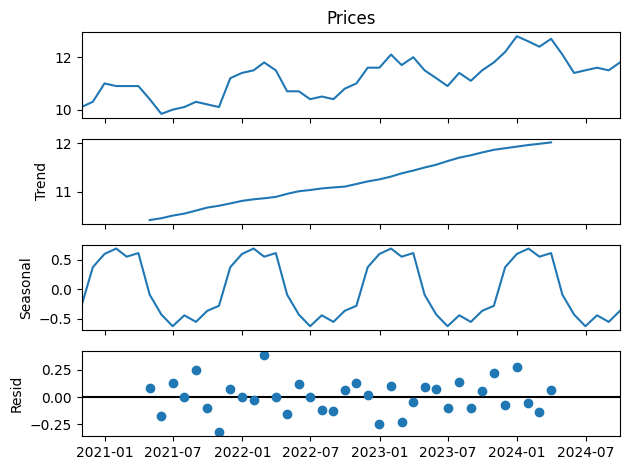

In [38]:
# Decompose trend, seasonality, and residuals
decomposition = seasonal_decompose(df['Prices'], model='additive', period=12)
decomposition.plot()
plt.show()

In [39]:
# Check for stationarity
result = adfuller(df['Prices'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 0.21807686170000096
p-value: 0.9732574388448694


c:\Users\mathi\Documents\Code\Quantitative Research - J.P. Morgan\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\mathi\Documents\Code\Quantitative Research - J.P. Morgan\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


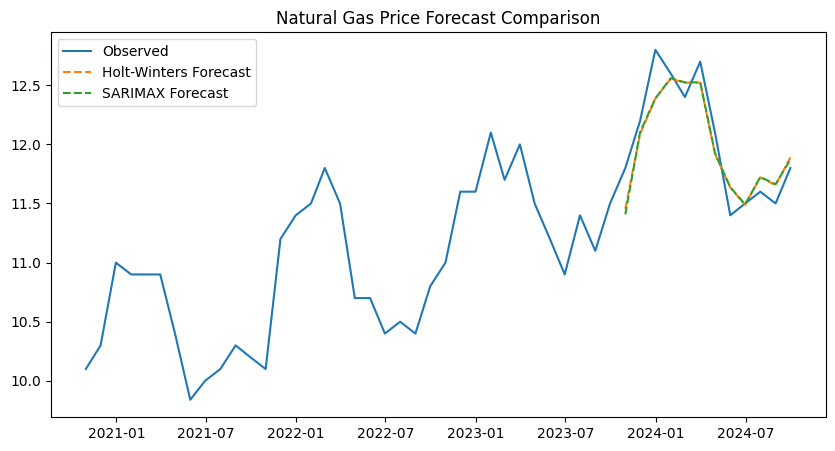

Holt-Winters MAE: 0.16694499863954362, MSE: 0.0402826107985917
SARIMAX MAE: 0.16842986385852857, MSE: 0.04291822487333397


In [63]:
# Comparing models
# Train-test split
train = df.iloc[:-12]
test = df.iloc[-12:]

# Holt-Winters (Exponential Smoothing)
model_hw = ExponentialSmoothing(train['Prices'], seasonal='add',  trend='add', seasonal_periods=12, freq='ME')
fit_hw = model_hw.fit()
forecast_hw = fit_hw.forecast(12)

# SARIMAX
model_sarimax = SARIMAX(train['Prices'], order=(1, 1, 1), seasonal_order=(0, 1, 1, 12), freq='ME')
fit_sarimax = model_sarimax.fit(disp=False)
forecast_sarimax = fit_sarimax.get_forecast(steps=12)
mean_forecast = forecast_sarimax.predicted_mean

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Prices'], label='Observed')
plt.plot(forecast_hw, label='Holt-Winters Forecast', linestyle='--')
plt.plot(mean_forecast, label='SARIMAX Forecast', linestyle='--')
plt.title('Natural Gas Price Forecast Comparison')
plt.legend()
plt.show()

# Evaluate models
mae_hw = mean_absolute_error(test['Prices'], forecast_hw)
mse_hw = mean_squared_error(test['Prices'], forecast_hw)
mae_sarimax = mean_absolute_error(test['Prices'], mean_forecast)
mse_sarimax = mean_squared_error(test['Prices'], mean_forecast)

print(f'Holt-Winters MAE: {mae_hw}, MSE: {mse_hw}')
print(f'SARIMAX MAE: {mae_sarimax}, MSE: {mse_sarimax}')